# Jupyter Notebook for CNN - Data Analysis

ideas:\
-DONE INDIVIDUAL / COLLABORATION / UNKNOWN [if multiple authors convert to "collaboration" (analyze months with the most colaboration / colaboration throughout the year)]\
-check the most common words in the tile and create a statistic (possibly the most common noun/name)\
-DONE count the number of each date to determine the fluctioation daily published articles\
-DONE sort the index\
-pie chart for authors throughout the time\
-progression of single author/collaborations/unknown as 3 curves in one plot\
-DONE combine xmls for all months in a loop\
-DONE possibly perform regression for the final month\
...\
-DONE on what day of the week were the articles published\
-make the charts interactive\
\
-PROBLEMS:\
-inconsistent formatting

Importing modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight") # seaborn OR seaborn-darkgrid OR ggplot (fun: fivethirtyeight) (without grid: seaborn-dark)
from numpy.polynomial import Polynomial
from sklearn import linear_model

Reading each month of the year and concatenating them into a single pandas dataframe

In [2]:
df_months = []
for i in range(1,13):
    df_months.append(pd.read_xml(f"xml_db/CNN_2021_{i}.xml"))
df_orig = pd.concat(df_months)
df_orig.shape

(3404, 6)

In [3]:
df_orig.head(3)

,date,title,url,author,textshort,textfull
0,2021-01-31,Ukraine Fast Facts,https://edition.cnn.com/2014/02/28/world/europ...,CNN Editorial Research,"Here's a look at Ukraine, the second-largest E...","Here's a look at Ukraine, the second-largest E..."
1,2021-01-30,Austrian man leaves fortune to French village ...,https://edition.cnn.com/2021/01/30/europe/fort...,"Eoin McSweeney and Arnaud Siad, CNN",An Austrian man who died in December has left ...,An Austrian man who died in December has left ...
2,2021-01-31,Manchester United star Marcus Rashford raciall...,https://edition.cnn.com/2021/01/31/football/ma...,"Ben Church, CNN",Manchester United forward Marcus Rashford has ...,Manchester United forward Marcus Rashford has ...


Re-shaping the dataframe 

In [4]:
# Removing everything but the meta-information
df = df_orig.loc[:, ["date", "title", "url", "author"]].copy()

# Sorting the dataframe by date (ascending)
df = df.sort_values("date", ascending=True).reset_index(drop=True)
df.head()


,date,title,url,author
0,2021-01-01,Australia has changed its national anthem in a...,https://edition.cnn.com/2021/01/01/australia/a...,"Jessie Yeung, CNN"
1,2021-01-01,2020 was a terrible year for Europe. 2021 is u...,https://edition.cnn.com/2020/12/31/europe/eu-b...,"Luke McGee, CNN"
2,2021-01-01,Leeds United owner Andrea Radrizzani defends c...,https://edition.cnn.com/2020/12/30/football/ka...,"Ben Church, CNN"
3,2021-01-01,Manchester United draw level with Liverpool as...,https://edition.cnn.com/2021/01/01/football/pr...,"Paul Gittings, CNN"
4,2021-01-02,Mauricio Pochettino takes charge at French pow...,https://edition.cnn.com/2021/01/02/football/pa...,"Paul Gittings, CNN"


# Publications by Date

In [5]:
publications = df.date.value_counts().sort_index().copy()
publications.head()

2021-01-01     4
2021-01-02     5
2021-01-03     7
2021-01-04     5
2021-01-05    10
Name: date, dtype: int64

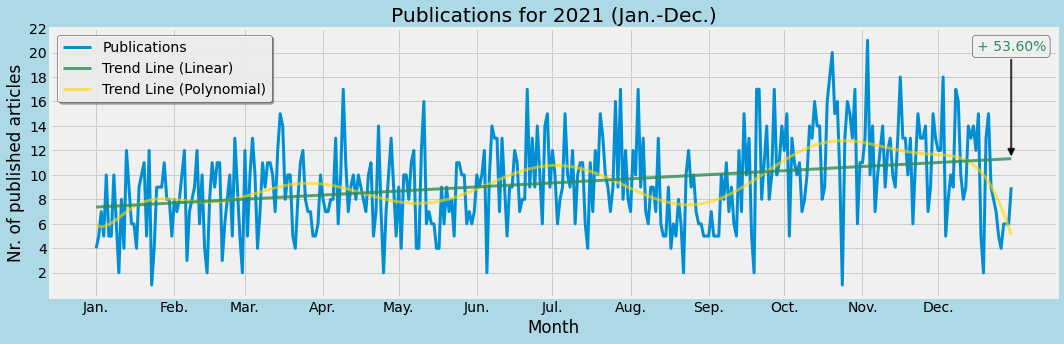

In [49]:
# List of months
m = ["Jan.", "Feb.", "Mar.", "Apr.", "May.", "Jun.", "Jul.", "Aug.", "Sep.", "Oct.", "Nov.", "Dec."]
d = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

# Initiating the plot 
fig_pub_year, ax_pub_year = plt.subplots(tight_layout=True)

# Feeding the data
publications.plot(x=publications.index, y=publications.values, title=f"Publications for 2021 ({m[0]}-{m[-1]})", kind="line", figsize=(15,5),
                    alpha=1, linewidth=3, label="Publications")

# Generating 1st trend line (polynomial regression)
X_poly = np.arange(len(publications.values))
y_poly = publications.values
p = Polynomial.fit(X_poly, y_poly, 12)
ax_pub_year.plot(X_poly, p(X_poly), linewidth=3, c="gold", linestyle="solid", alpha=0.6, label="Trend Line (Polynomial)")

# Generating 2nd trend line (linear regression)
reg = linear_model.LinearRegression()
X_reg = np.arange(0, len(publications.index))[:, np.newaxis]
y_reg = publications.values[:, np.newaxis]
reg.fit(X_reg, y_reg)
y_reg_pred = reg.predict(X_reg)
ax_pub_year.plot(X_reg, y_reg_pred, linewidth=3, c="seagreen", linestyle="solid", alpha=0.8, label="Trend Line (Linear)")
                    #marker="^", markevery=[-1], markersize=15,
                    #markerfacecolor="seagreen", markeredgecolor="black")

# Predicting publications for December
#X_dec = np.arange(len(X)-1, 365-1)[:, np.newaxis]
#y_dec = reg.predict(X_dec)
#ax_pub_year.plot(X_dec, y_dec, linewidth=3, c="yellow", alpha=0.8)

"""ax_pub_year.annotate(f"+ {'%.2f' % np.round((p(X_poly)[-1] - p(X_poly)[0])/p(X_poly)[0]*100, 2)}%", xy=(X_poly[-1], p(X_poly)[-1]), xytext=(X_poly[-1], p(X_poly)[-1]+8), c="black", ha="center",
                        arrowprops=dict(width=2, headwidth=10, facecolor="black", shrink=0))
"""
"""ax_pub_year.annotate(None, xy=(X_reg[-1], y_reg_pred[-1]), xytext=(X_reg[-1], y_reg_pred[0]), c="seagreen",
                        arrowprops=dict(arrowstyle="<->", linewidth=2, color="black", shrinkA=0, shrinkB=0))
"""
# Calculating and displaying the growth in percent
ax_pub_year.annotate(f"+ {'%.2f' % np.round((y_reg_pred[-1] - y_reg_pred[0])/y_reg_pred[0]*100, 2)}%", ha="center", va="center",
                        xy=(X_reg[-1], y_reg_pred[-1]), xytext=(X_reg[-1], ax_pub_year.get_ylim()[1] - 1.5), c="seagreen",
                        bbox=dict(boxstyle="round", facecolor="#f0f0f0", edgecolor="black", alpha=0.8),
                        arrowprops=dict(arrowstyle="-|>", linewidth=2, color="black", alpha=0.8))

# Configurating the chart
fig_pub_year.set_facecolor("lightblue") # outer
#ax_pub_year.set_facecolor('lightgrey') # inner
#ax_pub_year.set_xticks(np.arange(0,len(publications), step=len(publications)/12))
ax_pub_year.set_xticks([np.sum(d[:i]) for i in range(len(d))]) # distance according to nr of days in month
ax_pub_year.set_xticklabels(m, rotation=0, ha="center")
ax_pub_year.set_yticks(np.arange(0,np.max(publications)+2, step=2)[1:])
ax_pub_year.set_xlabel("Month")
ax_pub_year.set_ylabel("Nr. of published articles")

handles, labels = ax_pub_year.get_legend_handles_labels() # handles, labels are extracted and then reordered to achieve a more pleasant look
ax_pub_year.legend(handles=handles[:1]+handles[-1:]+handles[1:2], labels=labels[:1]+labels[-1:]+labels[1:2], loc="upper left", title=None,
                    facecolor="white", edgecolor="black", fancybox=True, shadow=True, borderpad=None, framealpha=0.8)

# Drawing vertical separators for each month (if theme without a grid is used)
#dd = [np.sum(d[:i]) for i in range(len(d))]
#for xc in dd:
    #ax_pub_year.axvline(x=xc, c="red", linewidth=1)

#fig_pub_year.savefig("pub_year", facecolor="lightblue")

# Publications by Weekday

In [7]:
weekdays_pub = df.date.value_counts().sort_index().copy()
weekdays_pub.head(3)

2021-01-01    4
2021-01-02    5
2021-01-03    7
Name: date, dtype: int64

In [8]:
# List of weekdays
week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Converting the list of weekdays to get: 1st of January, 2021 as Friday
start_day = lambda day : week[week.index(day):] + week[:week.index(day)] if week.index(day) else None
week_custom = start_day("Friday")

# Generating a list of weekdays with the lenght of pandas.Series index
weekdays = []
i = 0
j = 0
while i < len(weekdays_pub.index):
    if j == len(week_custom):
        j = 0
    weekdays.append(week_custom[j])
    i += 1
    j += 1

weekdays_pub.index = weekdays   

Performing a detailed analysis to be displayed as a box plot

In [9]:
# Initiating an empty dataframe 
weekdays_pub_df =  pd.DataFrame(columns=week)

# Populating the new dataframe with sorted content from previous processing steps
for day in weekdays_pub_df:
    weekdays_pub_df[day] = pd.Series(weekdays_pub[day].values.astype(float)) # using pandas Series to handle uneven number of rows smoothly
weekdays_pub_df.head(5)

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,5.0,10.0,5.0,5.0,4.0,5.0,7.0
1,8.0,4.0,12.0,9.0,10.0,6.0,2.0
2,9.0,10.0,11.0,5.0,6.0,6.0,4.0
3,9.0,9.0,9.0,11.0,12.0,1.0,4.0
4,8.0,7.0,8.0,10.0,8.0,8.0,5.0


Text(0, 0.5, 'Nr. of published articles')

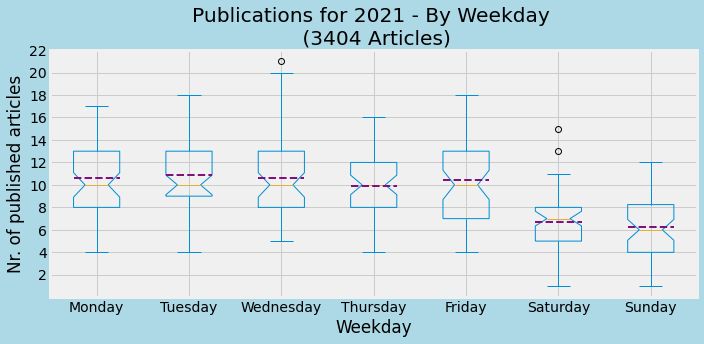

In [10]:
# Inititating the plot
fig_days, ax_days = plt.subplots(tight_layout=True)

# Feeding the data (pandas Dataframe)
weekdays_pub_df.plot(kind="box", notch=True, meanline=True, showmeans=True, meanprops=dict(linestyle='--', linewidth=2, color="#810f7c"),
            patch_artist=False,
            title=f"Publications for 2021 - By Weekday \n ({np.sum(weekdays_pub.values)} Articles)",
            figsize=(10,5), ax=ax_days)

# Annotating individual bars
"""for bar in ax_days.patches:
    ax_days.annotate(bar.get_height(), (bar.get_x() + bar.get_width()/2, bar.get_height()),
    xytext=(0,6), textcoords="offset points", ha="center", va="center")"""

# Configuring the chart
fig_days.set_facecolor("lightblue")
#ax_days.set_xticklabels(labels=weekdays_pub_test_df.index, rotation=0)
ax_days.set_yticks(np.arange(0,np.max(weekdays_pub_df.max().max())+2, step=2)[1:])
ax_days.set_xlabel("Weekday")
ax_days.set_ylabel("Nr. of published articles")

#fig_days.savefig("days", facecolor="lightblue")

Alternatively, relevant information can be extracted in additional steps and combinied into a more compact dataframe. This allows for different uniform plots by simply switching the column.

In [11]:
# Aggregating the publications for each day of the week
weekdays_pub_alt = weekdays_pub.groupby(weekdays_pub.index).sum().reindex(week)
weekdays_pub_alt

Monday       554
Tuesday      567
Wednesday    550
Thursday     517
Friday       544
Saturday     349
Sunday       323
Name: date, dtype: int64

In [12]:
# (As an example) Computing mean and standard deviations for each day of the week
weekdays_pub_mean = []
weekdays_pub_std = []

for i in week:
    weekdays_pub_mean.append(np.round(np.mean(weekdays_pub.loc[i].values), 2))
    weekdays_pub_std.append(np.round(np.std(weekdays_pub.loc[i].values), 2))

# Combining pre-computed data to a new dataframe
weekdays_pub_df_alt =  weekdays_pub_alt.to_frame(name="TOTAL")
weekdays_pub_df_alt["MEAN"] = weekdays_pub_mean
weekdays_pub_df_alt["STD"] = weekdays_pub_std
weekdays_pub_df_alt # alternatively use .transpose()

,TOTAL,MEAN,STD
Monday,554,10.65,3.26
Tuesday,567,10.90,3.43
Wednesday,550,10.58,3.83
Thursday,517,9.94,2.65
Friday,544,10.46,3.39
Saturday,349,6.71,2.48
Sunday,323,6.21,2.82


Text(0, 0.5, 'Nr. of published articles')

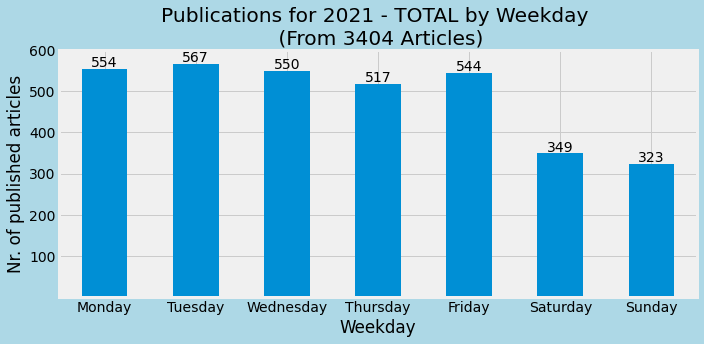

In [13]:
# Declaring the column to be plotted
col = "TOTAL"

# Inititating the plot
fig_days_alt, ax_days_alt = plt.subplots(tight_layout=True)

# Feeding the data (pandas Series)
weekdays_pub_df_alt[col].plot(kind="bar",
                            title=f"Publications for 2021 - {col} by Weekday \n (From {np.sum(weekdays_pub.values)} Articles)",
                            figsize=(10,5))

# Annotating individual bars
for bar in ax_days_alt.patches:
    ax_days_alt.annotate(bar.get_height(), (bar.get_x() + bar.get_width()/2, bar.get_height()),
    xytext=(0,6), textcoords="offset points", ha="center", va="center")

# Configuring the chart
fig_days_alt.set_facecolor("lightblue")
ax_days_alt.set_xticklabels(labels=weekdays_pub_df_alt.index, rotation=0)
ax_days_t_y = ax_days_alt.get_yticks() # getting the automatic asignment of y_ticks (large variation in scale expected when switching df columns)
ax_days_alt.set_yticks(ax_days_t_y[1:]) # dropping the first value (0) of y_ticks
ax_days_alt.set_xlabel("Weekday")
ax_days_alt.set_ylabel("Nr. of published articles")

#fig_days_alt.savefig("days_alt", facecolor="lightblue")

Some ideas for extending this approach

In [14]:
mean_mf, std_mf = np.mean(weekdays_pub.values[:5]), np.std(weekdays_pub.values[:5])
mean_ss, std_ss = np.mean(weekdays_pub.values[5:]), np.std(weekdays_pub.values[5:])

print(f"{mean_mf=} | {std_mf=}")
print(f"{mean_ss=} | {std_ss=}")

mean_mf=6.2 | std_mf=2.1354156504062622
mean_ss=9.395543175487465 | std_ss=3.65726387105294


# Publications by Author

In [22]:
authors = df.author.copy()
authors.head()

0     Jessie Yeung, CNN
1       Luke McGee, CNN
2       Ben Church, CNN
3    Paul Gittings, CNN
4    Paul Gittings, CNN
Name: author, dtype: object

In [23]:
# Storing the samples in the corresponding list to be insplected (if needed)
single = [] # single author
collab = [] # collaboration of multiple authors on the "contents" of the articel (excluding production of complementary photos, videos, etc.)
unknown = [] # no author names are provided

# Special cases (these are rare instances that are not covered by the implemented rules)
special_single = ["Jack Bantock. CNN", "John Sinnott CNN"]

for index, value in authors.items():
    s = value.split(',')
    if value in special_single:
        single.append(value)
        authors.iloc[index] = "Single author"
    elif " and " in value or "&" in value: # all cases with and (including collabs of "CNN & Reuters")
        collab.append(value)
        authors.iloc[index] = "Collaboration"
    elif len(s) == 1 and "cnn" in s[0].lower(): # cnn; cnn editorial research
        unknown.append(value)
        authors.iloc[index] = "Unknown"
    elif len(s) == 1 and " " in s[0]: # author (will also falsely include company names of multiple words BUT none have been observed so far)
        single.append(value)
        authors.iloc[index] = "Single author"
    elif len(s) == 2 and "cnn" in s[-1].lower(): # author, cnn
        single.append(value)
        authors.iloc[index] = "Single author"
    elif len(s) >= 2: # author, author (,author, etc.) OR author, author (,author, etc.), cnn
        collab.append(value)
        authors.iloc[index] = "Collaboration"
    else:
        unknown.append(value) # Reuters
        authors.iloc[index] = "Unknown"

print(f'Total count of processed elements: {np.sum([len(single), len(collab), len(unknown)])}')

authors = authors.value_counts()
authors

Total count of processed elements: 3404


Single author    1970
Collaboration    1042
Unknown           392
Name: author, dtype: int64

Text(0.8, 1.0, 'Publications for 2021 - By Author')

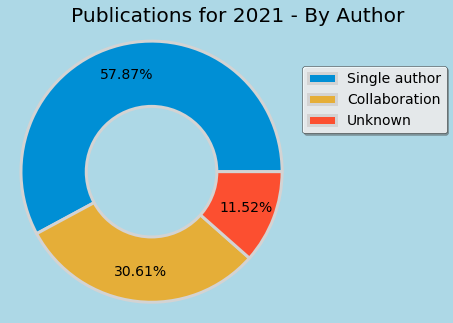

In [24]:
# Initiating the plot
fig_authors, ax_authors = plt.subplots(tight_layout=False)

# Feeding the data (pandas Series)
authors.plot(kind="pie", labels=None, radius=1, wedgeprops = {"linewidth": 3, "edgecolor" : "lightgrey"},
                            autopct="%.2f%%", pctdistance=0.77, shadow=False, startangle=0, figsize=(4,4),
                            colors=["#008fd5", "#e5ae38", "#fc4f30"]) # #008fd5, #fc4f30, #e5ae38, #6d904f, #8b8b8b, #810f7c

# Creating adoughnut chart
circle = plt.Circle((0,0), 0.5, facecolor="lightblue", edgecolor="lightgrey", linewidth=3, fill=True)
p = plt.gcf()
p.gca().add_artist(circle)

# Configuring the chart
fig_authors.subplots_adjust(left=0, right=1, bottom=0, top=1, wspace=0, hspace=0)
ax_authors.axis("equal")
ax_authors.margins(0.05, 0.05)

fig_authors.set_facecolor("lightblue")
ax_authors.axis('off')
ax_authors.legend(labels=authors.index, loc="center left", title=None, bbox_to_anchor=(1, 0.75),
                    facecolor="white", edgecolor="black", fancybox=True, shadow=True, borderpad=None, framealpha=0.8)
ax_authors.set_title("Publications for 2021 - By Author", loc="center", x=0.8)

#fig_authors.savefig("authors", facecolor="lightblue", bbox_inches="tight")

Each category can be inspected further (analysis, debugging, etc.)

In [25]:
# Converting to pandas Series
test_series = pd.Series(unknown)
test = test_series.value_counts(normalize=True) # as percentage
test

Reuters                   0.681122
CNN Editorial Research    0.173469
CNN                       0.086735
CNN Sports staff          0.028061
CNN Sport staff           0.015306
CNN staff                 0.007653
CNN Sport Staff           0.005102
CNN's Beijing bureau      0.002551
dtype: float64

<AxesSubplot:>

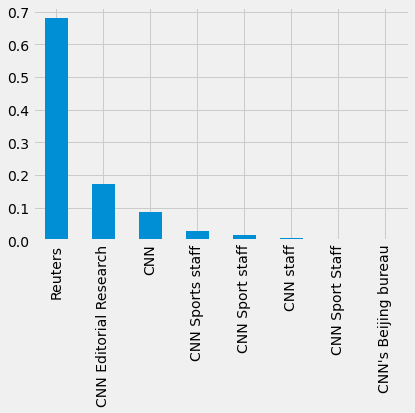

In [26]:
test.plot(kind="bar")

# All months can also be analyzed individually

Converting one .xml file (one selected month) into a pandas dataframe

In [75]:
xml_one_month = "CNN_2021_1.xml"
df_one_month = pd.read_xml(f"xml_db/{xml_one_month}")
print(f'{df_one_month.shape=}')

df_one_month.shape=(219, 6)


# Publications (for one month) by Date

In [76]:
publications_one_month = df_one_month.date.value_counts().sort_index().copy()
publications_one_month.head()

2021-01-01     4
2021-01-02     5
2021-01-03     7
2021-01-04     5
2021-01-05    10
Name: date, dtype: int64

Vertical layout for a calender-like look

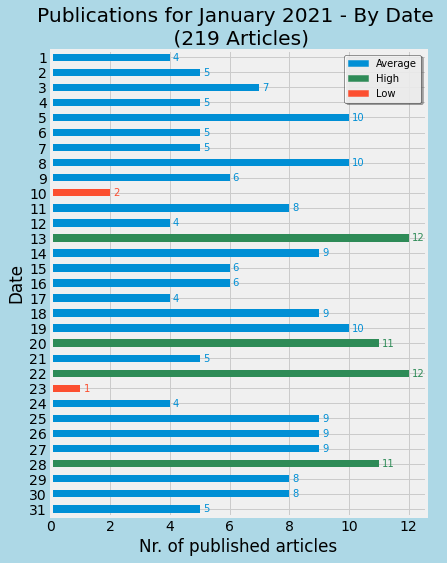

In [77]:
# Defining the variables
m_full = ["January", "February", "March", "April", "May", "June", "July", "August", "Sepember", "October", "November", "December"]
y_xml, m_xml = int(xml_one_month.split(".")[0].split("_")[1]), int(xml_one_month.split(".")[0].split("_")[2])
avg = np.mean(publications_one_month.values)
std = np.std(publications_one_month.values)

# Adjusting the color scheme to represent "outliers"
bar_c = ["#fc4f30" if (d<np.round((avg-std),0)) else "seagreen" if (d>np.round((avg+std),0)) else "#008fd5" for d in publications_one_month.values]

# Initiating the plot
fig_pub_month, ax_pub_month = plt.subplots(tight_layout=False) # "False" looks better for vertical plots

# Feeding the data (pandas Series)
publications_one_month.plot(kind="barh", title=f"Publications for {m_full[m_xml-1]} {y_xml} - By Date \n ({np.sum(publications_one_month.values)} Articles)",
                            figsize=(6,8), alpha=1, linewidth=2, edgecolor=None, color=bar_c)

# Annotating individual bars
for bar in ax_pub_month.patches:
    if bar.get_width() < np.round((avg-std),0):
        x = "#fc4f30"
    elif bar.get_width() > np.round((avg+std),0):
        x = "seagreen"
    else:
        x="#008fd5"
    ax_pub_month.text(0.1 + bar.get_width(), bar.get_y() + bar.get_height()/2, bar.get_width(), ha="left", va="center", fontsize=10, color=x)

# Configuring the chart
fig_pub_month.set_facecolor("lightblue") # outer
#ax_pub.set_facecolor('lightgrey') # inner
ax_pub_month.set_xticks(np.arange(0,np.max(publications_one_month)+2, step=2)[:]) # including "0" for a balanced look
ax_pub_month.set_yticks(np.arange(len(publications_one_month))) # custom ticks 1/2
ax_pub_month.set_yticklabels(np.arange(1, len(publications_one_month)+1), rotation=0) # custom ticks 2/2
ax_pub_month.invert_yaxis() # starting with 1st of month on top of the chart
ax_pub_month.set_xlabel("Nr. of published articles")
ax_pub_month.set_ylabel("Date")

import matplotlib.patches as mpatches
blue_patch = mpatches.Patch(color="#008fd5", label="Average")
green_patch = mpatches.Patch(color="seagreen", label="High")
red_patch = mpatches.Patch(color="#fc4f30", label="Low")
ax_pub_month.legend(handles=[blue_patch, green_patch, red_patch], handleheight=bar.get_height(), loc="upper right", title=None,
                    facecolor="white", edgecolor="black", fancybox=True, shadow=True, borderpad=None, framealpha=0.8, fontsize=10)

#fig_pub_month.savefig("pub_month", facecolor="lightblue", bbox_inches="tight") # this approach is better for vertical plots

Or horizontal, for a more traditional representation

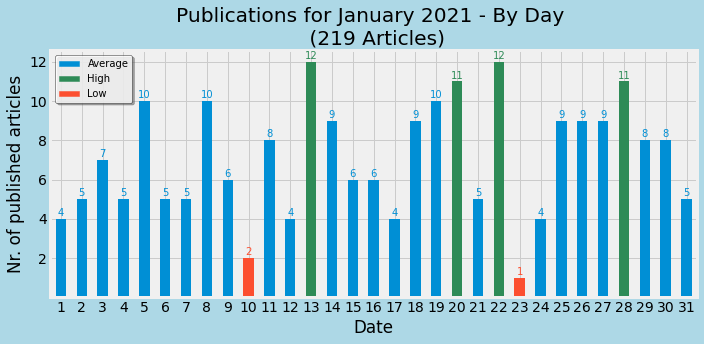

In [78]:
# Defining the variables
m_full = ["January", "February", "March", "April", "May", "June", "July", "August", "Sepember", "October", "November", "December"]
y_xml, m_xml = int(xml_one_month.split(".")[0].split("_")[1]), int(xml_one_month.split(".")[0].split("_")[2])
avg = np.sum(publications_one_month.values)//len(publications_one_month.values)
std = np.round(np.std(publications_one_month.values), 0)

# Adjusting the color scheme to represent "outliers"
bar_c = ["#fc4f30" if (d<avg-std) else "seagreen" if (d>avg+std) else "#008fd5" for d in publications_one_month.values]

# Initiating the plot
fig_pub_month, ax_pub_month = plt.subplots(tight_layout=True)

# Feeding the data (pandas Series)
publications_one_month.plot(kind="bar", title=f"Publications for {m_full[m_xml-1]} {y_xml} - By Day \n ({np.sum(publications_one_month.values)} Articles)",
                            figsize=(10,5), alpha=1, linewidth=2, edgecolor=None, color=bar_c)

# Annotating individual bars
for bar in ax_pub_month.patches:
    if bar.get_height() < avg-std:
        x = "#fc4f30"
    elif bar.get_height() > avg+std:
        x = "seagreen"
    else:
        x="#008fd5"
    ax_pub_month.annotate(bar.get_height(),(bar.get_x()+bar.get_width()/2, bar.get_height()),
    xytext=(0, 6), fontsize=10, color=x, textcoords="offset points", ha="center", va="center")

# Configuring the chart
fig_pub_month.set_facecolor("lightblue") # outer
#ax_pub.set_facecolor('lightgrey') # inner
ax_pub_month.set_xticks(np.arange(len(publications_one_month))) # custom ticks 1/2
ax_pub_month.set_xticklabels(np.arange(1, len(publications_one_month)+1), rotation=0) # custom ticks 2/2
ax_pub_month.set_yticks(np.arange(0,np.max(publications_one_month)+2, step=2)[1:])
ax_pub_month.set_xlabel("Date")
ax_pub_month.set_ylabel("Nr. of published articles")

import matplotlib.patches as mpatches
blue_patch = mpatches.Patch(color="#008fd5", label="Average")
green_patch = mpatches.Patch(color="seagreen", label="High")
red_patch = mpatches.Patch(color="#fc4f30", label="Low")
ax_pub_month.legend(handles=[blue_patch, green_patch, red_patch], handleheight=bar.get_width(), loc="upper left", title=None,
                    facecolor="white", edgecolor="black", fancybox=True, shadow=True, borderpad=None, framealpha=0.8, fontsize=10)

#fig_pub_month.savefig("pub_month_alt", facecolor="lightblue")